In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.model_selection import train_test_split
%matplotlib inline

Accuracy of training set is 1.0
Accuracy of testing set is 0.8113522537562604
[[48  0  0  0  1  0  0  0  4  0]
 [ 0 51  3  0  3  1  1  1  2  1]
 [ 0  3 48  0  0  0  0  2  4  0]
 [ 0  0  2 48  0  2  0  1  6  1]
 [ 1  0  0  0 50  1  0  2  0  0]
 [ 0  1  1  1  0 44  2  2  5  2]
 [ 0  3  2  1  1  4 50  0  4  0]
 [ 0  1  1  1  3  1  1 49  2  0]
 [ 0  2  2  0  3  1  0  0 46  6]
 [ 0  3  0  3  0  3  0  1  8 52]]


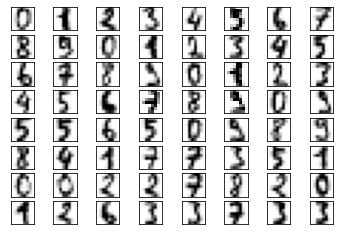

In [2]:
from sklearn.datasets import load_digits
data = load_digits()
#print(data.DESCR)
x,y =data.data, data.target
fig, axes =plt.subplots(8,8)#
for i ,ax in enumerate(axes.flat):
    ax.imshow(x[i,:].reshape((8,8)),cmap='Greys') 
    ax.set(xticks=[],yticks=[])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3.0)#將data.data和data.target產生資料拆分成訓練及測試二組。
tree =DecisionTreeClassifier(max_depth=14,random_state=17)#設定模式訓練規則 max_depth = 最大深度 random_state=随机状态
tree.fit(x_train,y_train)#帶入訓練資料
y_pred = tree.predict(x_test)#帶入測試資料做驗算，用x_test作出來的Y值(y_hat)和(y_test)比對
print(f'Accuracy of training set is {accuracy_score(y_train,tree.predict(x_train))}')#印出結果
print(f'Accuracy of testing set is {accuracy_score(y_test,y_pred)}')#印出結果
cm = confusion_matrix(y_test,y_pred)
print(cm)


In [1]:
from sklearn.datasets import fetch_openml
data = fetch_openml("mnist_784")

檢視資料

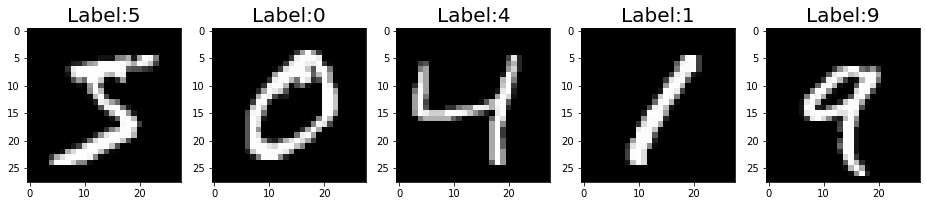

In [48]:
x, y =np.array(data.data),np.array(data.target)
plt.figure(figsize=(16,4))
for i, image in enumerate(x[:5,:]):
    plt.subplot(1,5,i+1)#
    plt.imshow(np.reshape(image,(28,28)),cmap=plt.cm.gray)
    plt.title(f'Label:{y[i]}', fontsize=20)
    

    

判斷資料

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/7.0)#將data.data和data.target產生資料拆分成訓練及測試二組。
tree =DecisionTreeClassifier(max_depth=60,random_state=17)#設定模式訓練規則 max_depth = 最大深度 random_state=随机状态
tree.fit(x_train,y_train)#帶入訓練資料
y_pred = tree.predict(x_test)#帶入測試資料做驗算，用x_test作出來的Y值(y_hat)和(y_test)比對
print(f'Accuracy of training set is {accuracy_score(y_train,tree.predict(x_train))}')#印出結果
print(f'Accuracy of testing set is {accuracy_score(y_test,y_pred)}')#印出結果
cm = confusion_matrix(y_test,y_pred)
print(cm)




Accuracy of training set is 1.0
Accuracy of testing set is 0.8706
[[ 898    3   20   11    6   17   20    2   11    5]
 [   1 1023    5    9    3    7    3    5    7    6]
 [   6    6  849   35   13    9   25   29   40    8]
 [  12    6   22  886   10   38    8   20   34   29]
 [   9    6   14    6  889    4   12   15   26   54]
 [  11   12    4   42    6  736   19    7   30   13]
 [   7    1   12    5   22   25  881    3   17    6]
 [   4    5   15   12    8    5    0  949   12   25]
 [  10    9   23   34   21   36   17    9  732   26]
 [   6    4    7   13   48   16    8   25   17  863]]


In [65]:
#Grid SearchCV（網格搜索法）
from sklearn.model_selection import GridSearchCV

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/7.0)#將data.data和data.target產生資料拆分成訓練及測試二組。
tree_params={'max_depth':range(3,21,1)} #用字典方式，設定max_depth的參數，由3次到21次，每次加1。
tree_grid = GridSearchCV(tree, param_grid=tree_params, cv=6 ,n_jobs=-1)
#設定tree_grid模式測試參數，cv:把資料分成5份，4份作訓練、1份作比對，n_jos=-1設定多核CUP運作方式，-1表依機器設定

tree_grid.fit(x_train,y_train) #帶入訓練資料
print(f'Best Params is{tree_grid.best_params_}') #印出測試後的到最佳參數
print(f'Best Score is{tree_grid.best_score_}') #印出測試後的到最佳分數
print(f'accuracy of tree_grid is {accuracy_score(y_test,tree_grid.predict(x_test))}')

Best Params is{'max_depth': 15}
Best Score is0.8707833333333334
accuracy of tree_grid is 0.8764


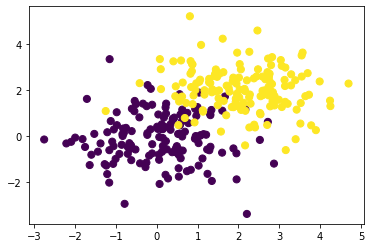

In [6]:
train_dataSize = 150
test_dataSize = 1000
noise = 0.1
rnd = np.random.RandomState(17)
x_train =np.r_[rnd.normal(size=(train_dataSize,2)),rnd.normal(loc=2,size=(train_dataSize,2))]
y_train = np.r_[np.zeros(train_dataSize),np.ones(train_dataSize)]
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,s=50)#檢視資料

x_train =np.r_[rnd.normal(size=(train_dataSize,2)),rnd.normal(loc=2,size=(train_dataSize,2))]
y_train = np.r_[np.zeros(train_dataSize),np.ones(train_dataSize)]

In [20]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(f"Accuacy of Training Set is{accuracy_score(y_train,knn.predict(x_train))}")
print(f"Accuacy of Tesing Set is{accuracy_score(y_test,y_pred)}")

tree = DecisionTreeClassifier(max_depth=9)#設定模式訓練規則 max_depth = 最大深度 random_state=随机状态
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print(f"Accuacy of Training Set is{accuracy_score(y_train,tree.predict(x_train))}")
print(f"Accuacy of Tesing Set is{accuracy_score(y_test,y_pred)}")


Accuacy of Training Set is0.97815
Accuacy of Tesing Set is0.9706
Accuacy of Training Set is0.8654666666666667
Accuacy of Tesing Set is0.8398


[1, 2, 3, 4, 5, 7, 9, 11, 13, 15, 17, 19, 20, 40, 60, 80, 100, 120, 140, 160, 180]


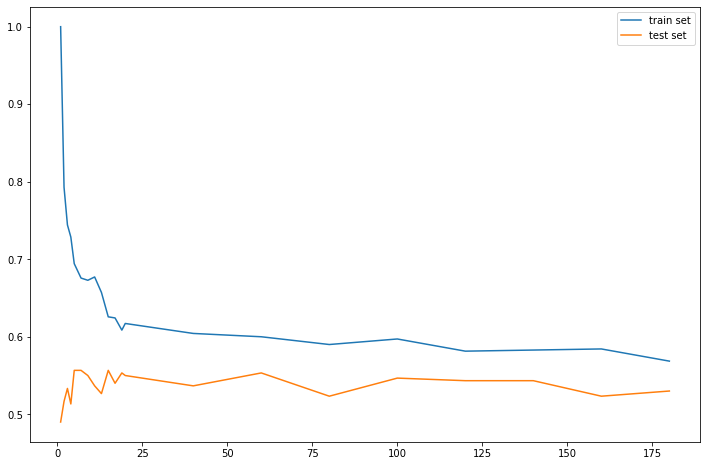

In [3]:
rnd = np.random.RandomState(17)
y= rnd.choice([-1,1],size=1000)
x1 = y*0.3
x2 = rnd.randn(1000,99)

x= np.c_[x1,x2]
x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=0.3)
train_score, test_score =[],[]
k_KNN = list(range(1,5))+list(range(5,20,2))+list(range(20,200,20))
print(k_KNN)
for k in k_KNN:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_train_pred = knn.predict(x_train)
    y_test_pred = knn.predict(x_test)
    train_score.append(accuracy_score(y_train,y_train_pred))
    test_score.append(accuracy_score(y_test,y_test_pred))

fig = plt.figure(figsize=(12,8))
plt.plot(k_KNN, train_score, label="train set")
plt.plot(k_KNN,test_score,label="test set")
plt.legend()


In [35]:
tree = DecisionTreeClassifier(max_depth=1,random_state=17)
tree.fit(x_train,y_train)
print(f"Accuacy of Training Set is{accuracy_score(y_train,tree.predict(x_train))}")
print(f"Accuacy of texting Set is{accuracy_score(y_test,tree.predict(x_test))}")

Accuacy of Training Set is1.0
Accuacy of texting Set is1.0
